In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# 🌦️ Analyse Exploratoire des Données Météo (EDA)
# Ce notebook explore les données météorologiques collectées pour quatre grandes villes :
# Antananarivo, Paris, Tokyo et London.
# Données issues de l’API OpenWeather + historiques fusionnées.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 📥 Chargement des données
df = pd.read_csv("/home/ny-antsaniaina/airflow/dags/examen/data/merge_weather.csv")
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()


,ville,date,temp,is_rainy,day,month,year
0,Antananarivo,2020-01-01,21.0,1,2020-01-01,1,2020
1,Antananarivo,2020-01-02,19.9,1,2020-01-02,1,2020
2,Antananarivo,2020-01-03,19.5,1,2020-01-03,1,2020
3,Antananarivo,2020-01-04,20.5,1,2020-01-04,1,2020
4,Antananarivo,2020-01-05,20.4,1,2020-01-05,1,2020


In [12]:
# 📊 Statistiques agrégées par ville
summary = df.groupby('ville').agg(
    temp_moyenne=('temp', 'mean'),
    temp_min=('temp', 'min'),
    temp_max=('temp', 'max'),
    ecart_type=('temp', 'std'),
    jours_pluvieux=('is_rainy', 'sum')
).reset_index()

summary['score_extreme'] = (
    (summary['temp_max'] - summary['temp_min']) +
    summary['ecart_type'] * 2 +
    summary['jours_pluvieux']
).round(2)

summary


,ville,temp_moyenne,temp_min,temp_max,ecart_type,jours_pluvieux,score_extreme
0,Antananarivo,18.357833,6.62,24.1,2.712639,1162,1184.91
1,London,11.657760,-5.00,29.2,5.618520,1236,1281.44
2,Paris,12.813924,-3.20,32.1,6.483577,1197,1245.27
3,Tokyo,15.853812,-1.90,34.6,8.523650,1085,1138.55


/tmp/ipykernel_10457/2274458746.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')


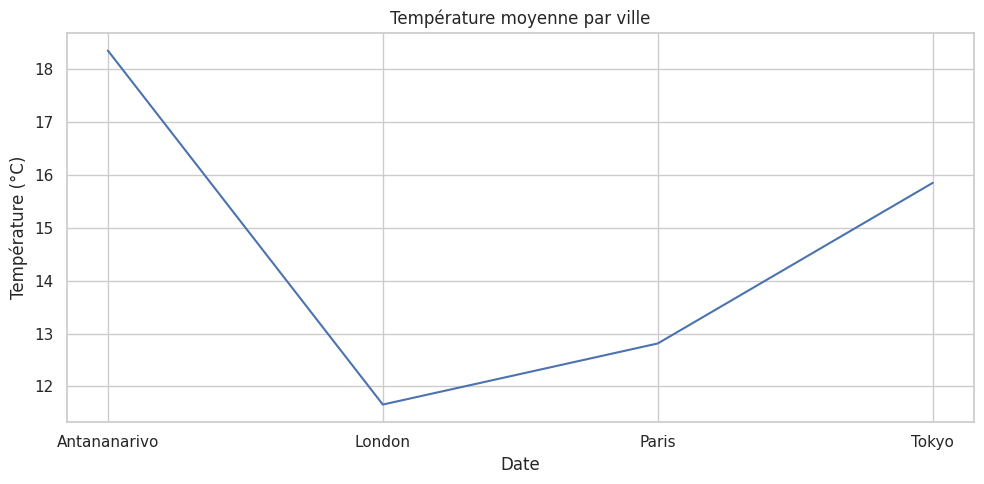

In [13]:
# 📈 Température moyenne par ville
plt.figure(figsize=(10,5))
sns.lineplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')
plt.title('Température moyenne par ville')
plt.xlabel("Date")
plt.ylabel('Température (°C)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_10457/3123101911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')


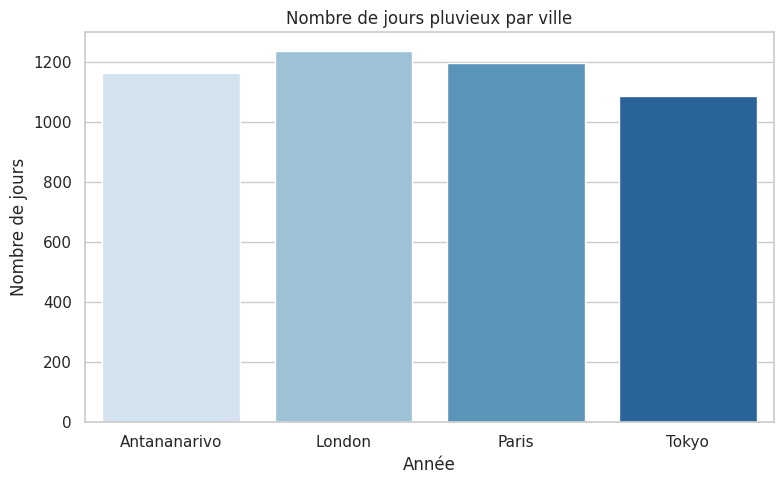

In [14]:
# ☔ Nombre de jours pluvieux par ville
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')
plt.title('Nombre de jours pluvieux par ville')
plt.xlabel("Année")
plt.ylabel('Nombre de jours')
plt.tight_layout()
plt.show()
